# Portfolio Optimization

# Importing libraries

In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt # to visualize
from matplotlib import style
from pandas_datareader import data as web # to collect data
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt # to specify start and end dates 
import mplfinance as mpf
import seaborn as sn # to plot the correlation matrix
style.use('ggplot')

# Start and End Date

In [6]:
start = dt.datetime(2014, 1, 1) # start date from when I want the data for the traditional asset and cryptocurrency
end = dt.datetime(2020, 2, 28) # end date upto when I want the data for the traditional asset and cryptocurrency 

# Pulling traditional asset data

In [7]:
TLT = web.DataReader('TLT', 'yahoo', start, end)
VT = web.DataReader('VT', 'yahoo', start, end)
VNQ = web.DataReader('VNQ', 'yahoo', start, end)
SPY = web.DataReader('SPY', 'yahoo', start, end)
IAU = web.DataReader('IAU', 'yahoo', start, end)
EEM = web.DataReader('EEM', 'yahoo', start, end)
DJCI = web.DataReader('DJCI', 'yahoo', start, end)

# Pulling crypto asset data

In [8]:
BTC = web.DataReader('BTC-USD', 'yahoo', start, end)
ETH = web.DataReader('ETH-USD', 'yahoo', start, end)
XRP = web.DataReader('XRP-USD', 'yahoo', start, end)
BCH = web.DataReader('BCH-USD', 'yahoo', start, end)
LTC = web.DataReader('LTC-USD', 'yahoo', start, end)
EOS = web.DataReader('EOS-USD', 'yahoo', start, end)
BNB = web.DataReader('BNB-USD', 'yahoo', start, end)
XTZ = web.DataReader('XTZ-USD', 'yahoo', start, end)
ADA = web.DataReader('ADA-USD', 'yahoo', start, end)
XLM = web.DataReader('XLM-USD', 'yahoo', start, end)
TRX = web.DataReader('TRX-USD', 'yahoo', start, end)
XMR = web.DataReader('XMR-USD', 'yahoo', start, end)
DASH = web.DataReader('DASH-USD', 'yahoo', start, end)
NEO = web.DataReader('NEO-USD', 'yahoo', start, end)
MIOTA = web.DataReader('MIOTA-USD', 'yahoo', start, end)
ZEC = web.DataReader('ZEC-USD', 'yahoo', start, end)
DOGE = web.DataReader('DOGE-USD', 'yahoo', start, end)
VET = web.DataReader('VET-USD', 'yahoo', start, end)
USDT = web.DataReader('USDT-USD', 'yahoo', start, end)

# Concatenating all the stock data in to one object called stocks & Crypto

In [9]:
stocks = pd.concat([TLT['Close'], VT['Close'], VNQ['Close'], SPY['Close'],IAU['Close'], EEM['Close'], DJCI['Close']], axis = 1)
crypto = pd.concat([BTC['Close'], ETH['Close'], XRP['Close'], BCH['Close'], LTC['Close'], EOS['Close'], BNB['Close'], XTZ['Close'], ADA['Close'], XLM['Close'], TRX['Close'], XMR['Close'], DASH['Close'], NEO['Close'], MIOTA['Close'], ZEC['Close'], DOGE['Close'], VET['Close'], USDT['Close']], axis = 1)

# Labeling the columns with the ticker name

In [10]:
stocks.columns = ['TLT', 'VT', 'VNQ', 'SPY', 'IAU', 'EEM', 'DJCI']
crypto.columns = ['BTC', 'ETH', 'XRP', 'BCH', 'LTC', 'EOS', 'BNB', 'XTZ', 'ADA', 'XLM', 'TRX', 'XMR', 'DASH', 'NEO', 'MIOTA', 'ZEC', 'DOGE', 'VET', 'USDT']

# Plotting Graphs

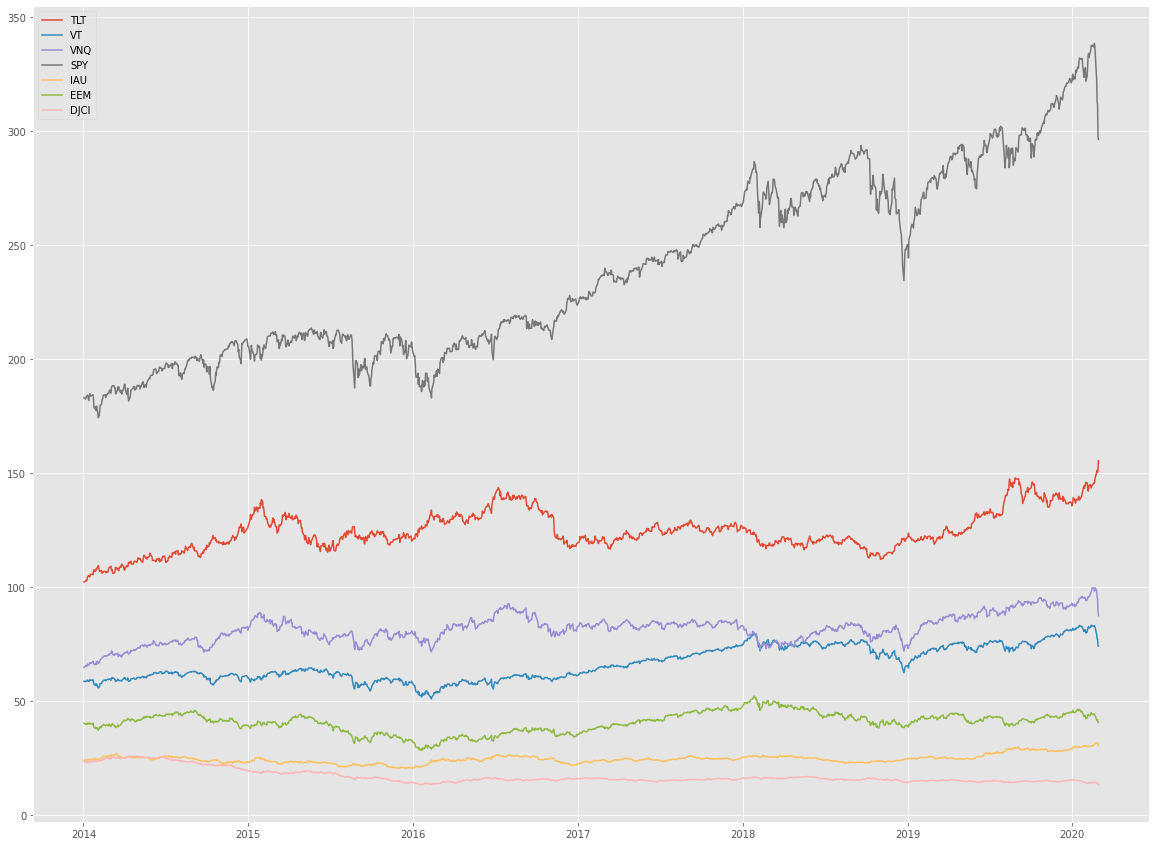

In [12]:
plt.figure(figsize =(20, 15))
plt.plot(stocks)
plt.legend(stocks)

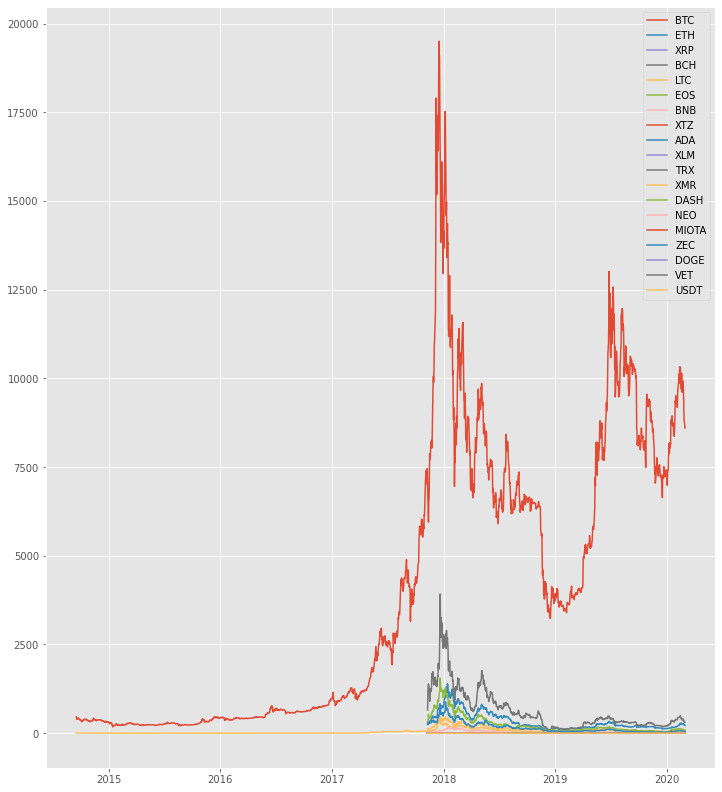

In [13]:
plt.figure(figsize = (12, 14))
plt.plot(crypto)
plt.legend(crypto)

# Computing the daily returns log (Current day - previous day)

In [9]:
stock_returns = np.log(stocks/stocks.shift(1))
crypto_returns = np.log(crypto/crypto.shift(1))

# Computing the Annualized Returns

In [10]:
annual_stock_returns = (stock_returns.mean()*252)*100 # Since traditional assets are traded only during the weekdays we take multiply it with 252. As we assume there are only 252 trading days in a year.
annual_crypto_returns = (crypto_returns.mean()*365)*100 # And as cryptocurrencies are traded 365 days a year we multiply it with 365

# Merging and displaying the annualized returns

In [11]:
# Adding Column heading for traditional assets - Annualized Returns

trad_asset_column_define = ['Annualized Return'] 

traditional_asset_table = pd.DataFrame(annual_stock_returns, columns= trad_asset_column_define)

# Adding Column heading for crypto assets - Annualized Returns

crypto_asset_column_define = ['Annualized Return'] 

crypto_asset_table = pd.DataFrame(annual_crypto_returns, columns = crypto_asset_column_define) 

# Computing standard deviation 

In [12]:
stock_std =stock_returns.std()*math.sqrt(252)*100 

# Adding Column heading for traditional assets

trad_asset_column_define_std = ['Standard Deviation'] 

crypto_std = crypto_returns.std()*math.sqrt(365)*100 

# Adding Column heading for crypto assets

crypto_asset_column_define_std = ['Standard Deviation'] 

# Merging and displaying the volatility returns

In [13]:
traditional_asset_table_std = pd.DataFrame(stock_std, columns= trad_asset_column_define_std) 

crypto_asset_table_std = pd.DataFrame(crypto_std, columns= crypto_asset_column_define_std) 

# Computing the Skew and Kurtosis

In [14]:
crypto_skew = crypto_returns.skew()
crypto_kurt = crypto_returns.kurt()

stock_skew = stock_returns.skew()
stock_kurt = stock_returns.kurt()

In [15]:
final1200 = [traditional_asset_table, crypto_asset_table]
final1201 = pd.concat(final1200)
final1202 = [traditional_asset_table_std, crypto_asset_table_std]
final1203 = pd.concat(final1202)

# combining traditional assets and crypto into one table

In [16]:
combined_data = [stock_returns, crypto_returns] 

# combining traditional assets and crypto into one table

In [17]:
port_final_data = pd.concat(combined_data) 

In [18]:
portfolio_final_data = port_final_data.fillna(0)

C:\Users\ajm210009\AppData\Local\Temp\ipykernel_7528\1639616935.py:30: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='SR')


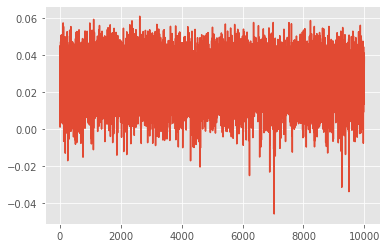

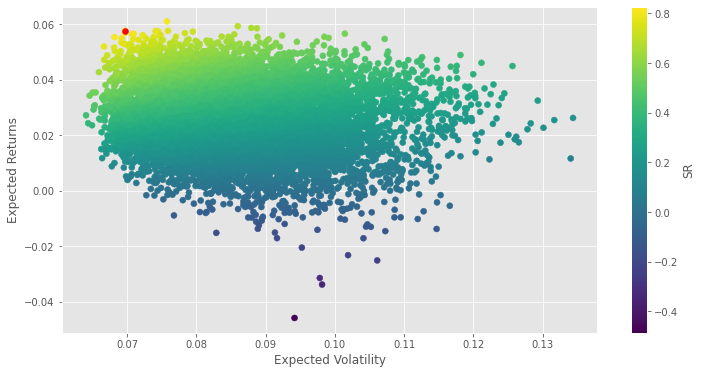

In [20]:
# Max Sharpe ratio (no short sale) Stocks Only

noOfPortfolios = 10000
weight = np.zeros((noOfPortfolios, 7))
expectedReturn = np.zeros(noOfPortfolios)
expectedVolatility = np.zeros(noOfPortfolios)
sharpeRatio = np.zeros(noOfPortfolios)
meanLogRet = stock_returns.mean()*252
Sigma = stock_returns.cov()*252
for k in range(noOfPortfolios):
    # generate random weight vector
    w = np.array(np.random.random(7))
    w = w /np.sum(w)
    weight[k,:] = w
    # Expected Log Returns
    expectedReturn[k] = np.sum( meanLogRet * w )
    # Expected volatility 
    expectedVolatility[k] = np.sqrt( np.dot(w.T, np.dot(Sigma, w)) )
    # Sharpe Ratio
    sharpeRatio[k] = expectedReturn[k]/expectedVolatility[k]

import matplotlib.pyplot as plt
plt.plot(expectedReturn)
maxIndex = sharpeRatio.argmax()
weight[maxIndex, :]
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(expectedVolatility, expectedReturn, c = sharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='SR')
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], c = 'red')
plt.show()

C:\Users\ajm210009\AppData\Local\Temp\ipykernel_7528\3391203626.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='SR')


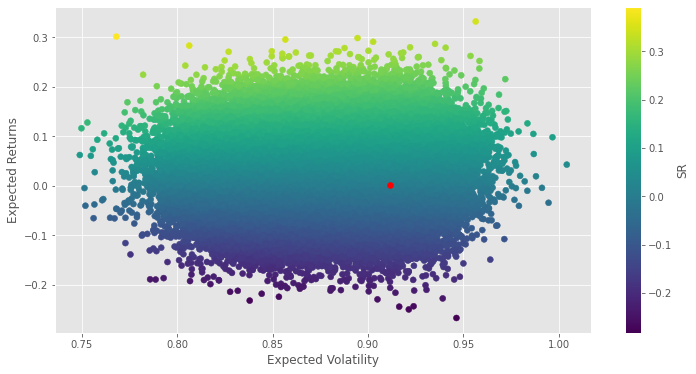

In [21]:
# Max Sharpe ratio Cryptocurrencies

noOfPortfolios = 100000
weight = np.zeros((noOfPortfolios, 19))
expectedReturn = np.zeros(noOfPortfolios)
expectedVolatility = np.zeros(noOfPortfolios)
sharpeRatio = np.zeros(noOfPortfolios)
meanLogRet = crypto_returns.mean()*365
Sigma = crypto_returns.cov()*365
for k in range(noOfPortfolios):
    # generate random weight vector
    w = np.array(np.random.random(19))
    w = w /np.sum(w)
    weight[k,:] = w
    # Expected Log Returns
    expectedReturn[k] = np.sum( meanLogRet * w )
    # Expected volatility 
    expectedVolatility[k] = np.sqrt( np.dot(w.T, np.dot(Sigma, w)) )
    # Sharpe Ratio
    sharpeRatio[k] = expectedReturn[k]/expectedVolatility[k]
    
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(expectedVolatility, expectedReturn, c = sharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='SR')
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], c = 'red')
plt.show()

C:\Users\ajm210009\AppData\Local\Temp\ipykernel_7528\2424171761.py:27: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='SR')


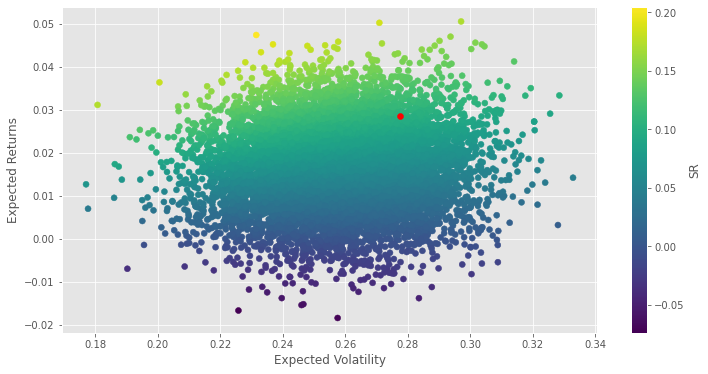

In [22]:
# Max Sharpe ratio (Mixed Portfolio) Stocks & Cryptocurrencies

noOfPortfolios = 10000
weight = np.zeros((noOfPortfolios, 26))
expectedReturn = np.zeros(noOfPortfolios)
expectedVolatility = np.zeros(noOfPortfolios)
sharpeRatio = np.zeros(noOfPortfolios)
meanLogRet = portfolio_final_data.mean()*252
Sigma = portfolio_final_data.cov()*252
for k in range(noOfPortfolios):
    # generate random weight vector
    w = np.array(np.random.random(26))
    w = w /np.sum(w)
    weight[k,:] = w
    # Expected Log Returns
    expectedReturn[k] = np.sum( meanLogRet * w )
    # Expected volatility 
    expectedVolatility[k] = np.sqrt( np.dot(w.T, np.dot(Sigma, w)) )
    # Sharpe Ratio
    sharpeRatio[k] = expectedReturn[k]/expectedVolatility[k]
    
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.scatter(expectedVolatility, expectedReturn, c = sharpeRatio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='SR')
plt.scatter(expectedVolatility[maxIndex], expectedReturn[maxIndex], c = 'red')
plt.show()

# Creating a Covariance Matrix

In [23]:
covar = portfolio_final_data.cov()*252

# Assigning Weights

In [24]:
stock_Corr_Matrix = stock_returns.corr()

In [25]:
crypto_Corr_Matrix = crypto_returns.corr()

In [44]:
total_corr = [stock_Corr_Matrix, crypto_Corr_Matrix]

In [46]:
final_corr = pd.concat(total_corr)

In [48]:
final_correlation = final_corr.fillna(0)

# Stock Correlation Matrix

<AxesSubplot:>

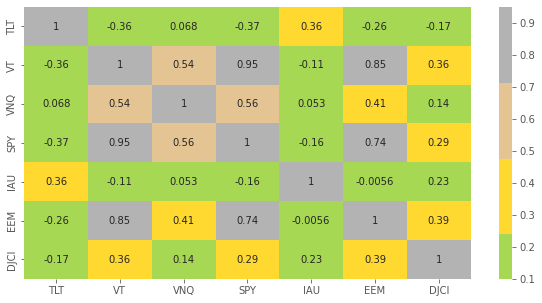

In [30]:
plt.figure(figsize=(10, 5))
sn.heatmap(data = stock_Corr_Matrix, annot = True, cmap = 'Set2', center = 0, vmin = 0.1, vmax = 0.95)

# Cryptocurrency Correlation Matrix

<AxesSubplot:>

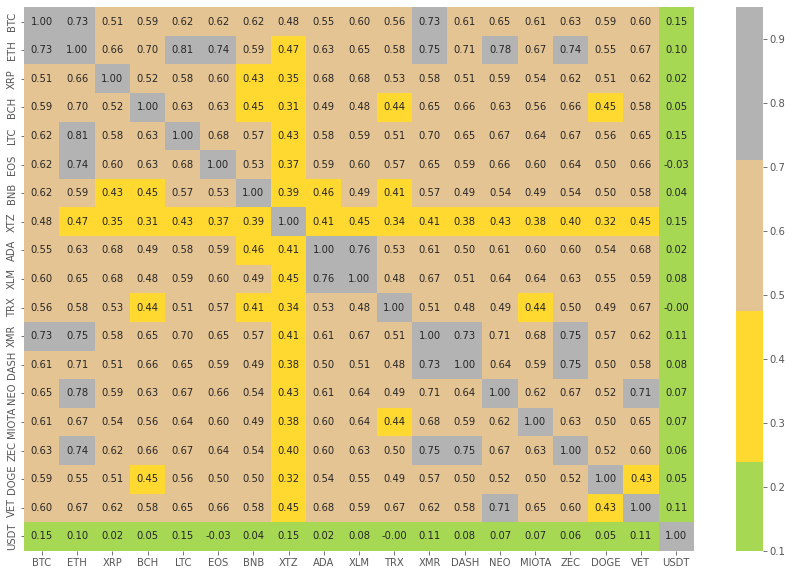

In [31]:
plt.figure(figsize=(15, 10))
sn.heatmap(data = crypto_Corr_Matrix, annot = True, cmap = 'Set2', fmt='.2f', center = 0, vmin = 0.1, vmax = 0.95)

# Final Correlation Matrix ------ Includes traditional assets and cryptocurrencies

<AxesSubplot:>

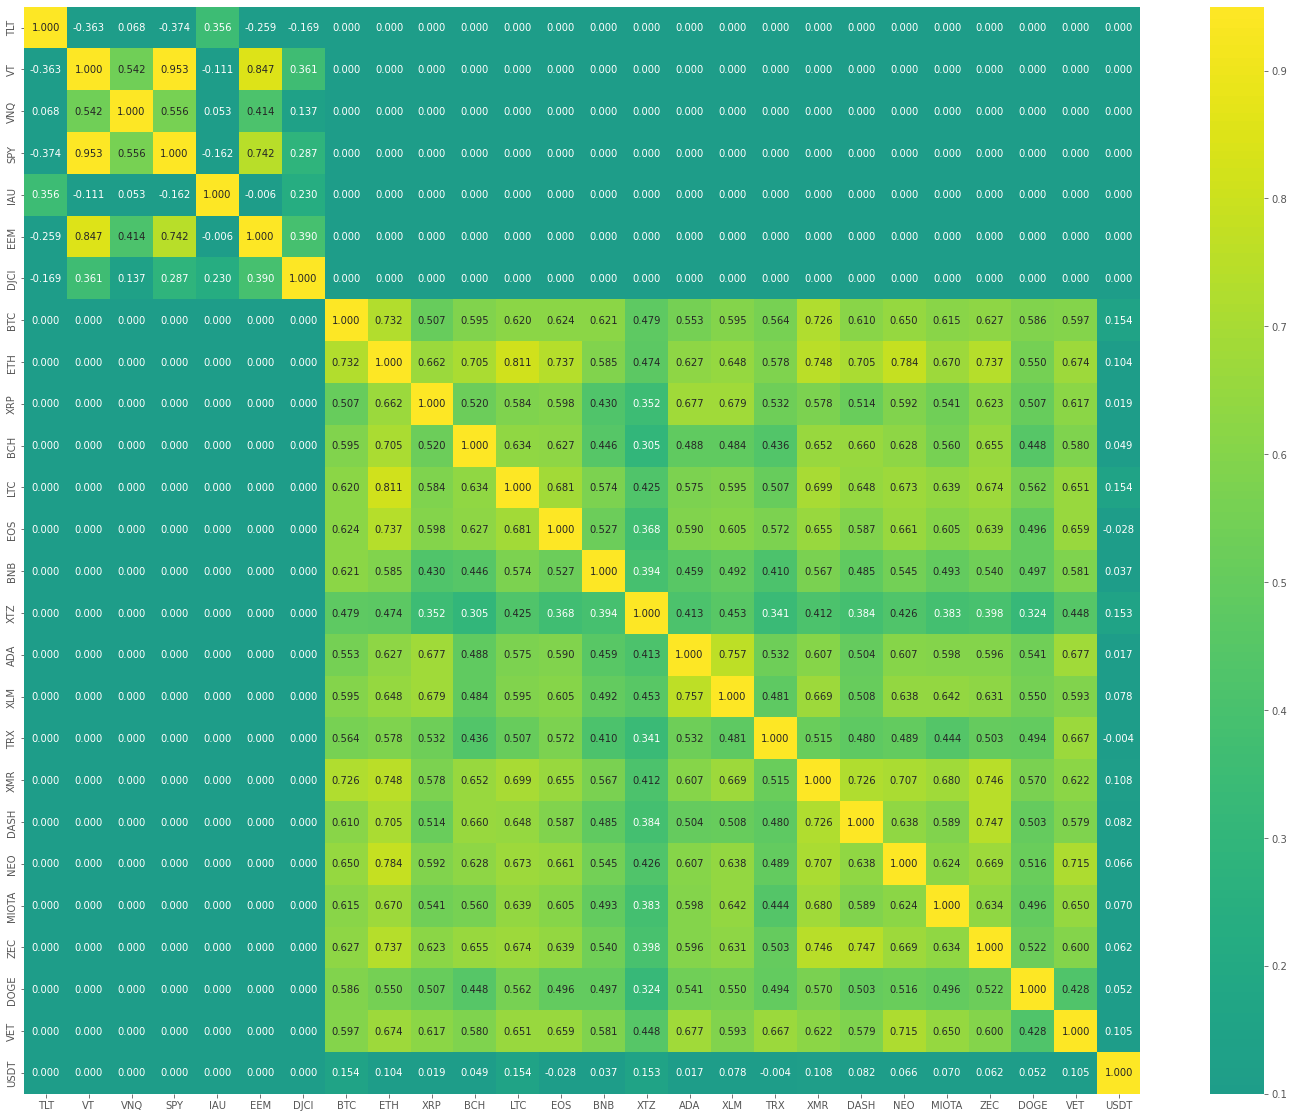

In [50]:
plt.figure(figsize=(25, 20))
sn.heatmap(data = final_correlation, annot = True, cmap = 'viridis', fmt='.3f', center = 0, vmin = 0.1, vmax = 0.95)

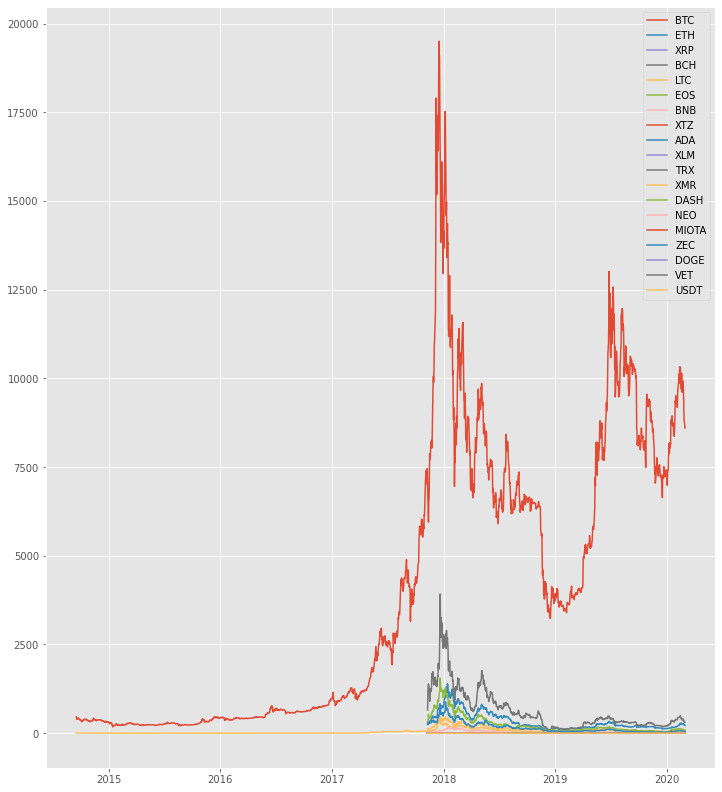